## Estimate lognormal distribution of farm sizes

Classification of farmers based on land holdings is as follows:
Marginal: < 1 ha
Small: 1-2 ha
Semi-medium: 2-4 ha
Medium: 4-10 ha
Large: >10 ha

In [1]:
from scipy.stats import lognorm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the shape of the distribution
# The parameters can be adjusted based on the characteristics of your specific data
shape, loc, scale = 0.92, 0, 1.25

# Draw random samples from the distribution for each farmer
farm_sizes = lognorm.rvs(shape, loc, scale, size=1230220)

# Cap farm sizes at 200 ha
farm_sizes = np.minimum(farm_sizes, 1000)

# Create a list of classes
classes = ['Marginal', 'Small', 'Semi medium', 'Medium', 'Large']

# Determine the number of farmers in each class
class_counts = np.histogram(farm_sizes, bins=[0, 1, 2, 4, 10, 200])[0]

# Determine the total area of land in each class. Take the sum of the farm sizes in each class.
class_areas = np.histogram(farm_sizes, bins=[0, 1, 2, 4, 10, 200], weights=farm_sizes)[0]

# Determine the average farm size in each class
class_sizes = class_areas / class_counts

# Create a dataframe with the results
df = pd.DataFrame({'Number': class_counts, 'Area': class_areas, 'Area per farmer': class_sizes}, index=classes)
df

,Number,Area,Area per farmer
Marginal,497476,287813.175517,0.578547
Small,357956,513225.280386,1.433766
Semi medium,248166,689381.443650,2.777904
Medium,111991,645684.047012,5.765499
Large,14631,211130.155641,14.430330


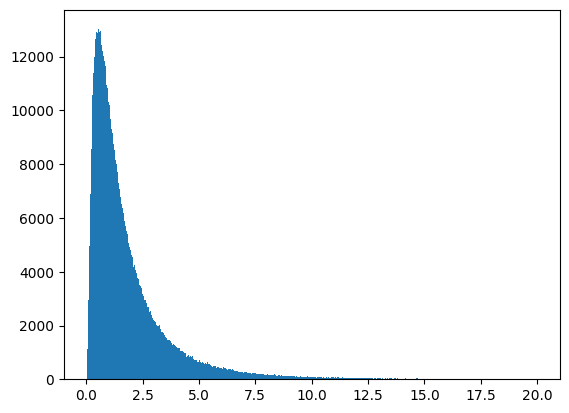

In [2]:
# Create a histogram of the farm sizes. Limit the x-axis to 30 ha.
plt.hist(farm_sizes, bins=1000, range=(0, 20))
plt.show()

In [3]:
# Load in the original data
df2 = pd.read_csv("../Data/Farmland/farmland_clean.csv", index_col=0)
df2 = df2.drop(df2.tail(1).index)
df2

,Number,Area,Area per farmer
Marginal,462990.0,251240.0,0.542647
Small,398200.0,565310.0,1.419663
Semi medium,250050.0,669320.0,2.676745
Medium,104880.0,595010.0,5.673246
Large,14110.0,198310.0,14.054571


In [4]:
# Calculate the relative difference between the two dataframes.
df_rel = (df - df2) / df2
df_rel

,Number,Area,Area per farmer
Marginal,0.074485,0.145571,0.066157
Small,-0.101065,-0.092135,0.009934
Semi medium,-0.007534,0.029973,0.037792
Medium,0.067801,0.085165,0.016261
Large,0.036924,0.064647,0.026736


In [5]:
# Take  the absolute sum of all relative differences
sums = df_rel.abs().sum()
print(f"Average relative difference: {sums.mean():.2%}\n{sums}")

Average relative difference: 28.74%
Number             0.28781
Area               0.41749
Area per farmer    0.15688
dtype: float64
